### The dataset `student-mat.csv` taken from kaggle https://www.kaggle.com/datasets/ishandutta/student-performance-data-set contains the performance data of student  in secondary education of two Portuguese schools. It comprises information about students' academic performance, as well as their demographic, social, and school-related characteristics and was gathered through a combination of school records and surveys/questionnaires. You can find more detail about the dataset's attribute in the student.txt file

### In this lab, our main objectives are:
### 1) Identify valuable insights influencing the students' final academic scores(G3).
### 2) Use these attributes to predict the student's final academic scores.

students.txt
```
# Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:
1 school - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)
2 sex - student's sex (binary: "F" - female or "M" - male)
3 age - student's age (numeric: from 15 to 22)
4 address - student's home address type (binary: "U" - urban or "R" - rural)
5 famsize - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)
6 Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart)
7 Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
8 Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
9 Mjob - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
10 Fjob - father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
11 reason - reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")
12 guardian - student's guardian (nominal: "mother", "father" or "other")
13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)
16 schoolsup - extra educational support (binary: yes or no)
17 famsup - family educational support (binary: yes or no)
18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19 activities - extra-curricular activities (binary: yes or no)
20 nursery - attended nursery school (binary: yes or no)
21 higher - wants to take higher education (binary: yes or no)
22 internet - Internet access at home (binary: yes or no)
23 romantic - with a romantic relationship (binary: yes or no)
24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)
26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)
27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29 health - current health status (numeric: from 1 - very bad to 5 - very good)
30 absences - number of school absences (numeric: from 0 to 93)

# these grades are related with the course subject, Math or Portuguese:
31 G1 - first period grade (numeric: from 0 to 20)
31 G2 - second period grade (numeric: from 0 to 20)
32 G3 - final grade (numeric: from 0 to 20, output target)
```

#### Step 1: Import all the necessary libraries. All your imports should be here and here only (2 marks)

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error

#### Step 2: Read the csv file and display the first few rows (2 marks)

In [4]:
df = pd.read_csv('student-mat.csv', delimiter=';')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [13]:
df.loc[0]

,0
school,GP
sex,F
age,18
address,U
famsize,GT3
Pstatus,A
Medu,4
Fedu,4
Mjob,at_home
Fjob,teacher


#### Step 3: Get to know your datasets. Check total number of rows and columns, what are the different columns, datatypes, basic statistics and missing values. How many of them are categorical column? Write a short report of your observation at the end.(5 marks + 1 marks + 1 marks)

In [9]:
df.shape

(395, 33)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [12]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [14]:
df.isna().sum()

,0
school,0
sex,0
age,0
address,0
famsize,0
Pstatus,0
Medu,0
Fedu,0
Mjob,0
Fjob,0


In [21]:
obj_cols = df.select_dtypes(include='object').columns
obj_cols, obj_cols.size

(Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
        'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
        'nursery', 'higher', 'internet', 'romantic'],
       dtype='object'),
 17)

In [22]:
num_cols = df.select_dtypes(exclude='object').columns
num_cols, num_cols.size

(Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
        'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
        'G3'],
       dtype='object'),
 16)

So few observations are:
1. No missing values which means its good.
2. There are total 17 categorical columns (probably need to encode them) and 16 numerical columns.
3. Average age of students is 17 with 3 health and 5 absences.
4. There are totally 33 features and 395 rows of data.

#### Step 4: Let's go back to the code where we outputted the basic statistics. What can you observe from that data? Do you notice anything wrong there? Does anything change in the categorical columns? (5 marks)

Analyze here:
```
              age	Medu	Fedu	traveltime	studytime	failures	famrel	freetime	goout	Dalc	Walc	health	absences	G1	G2	G3
mean	16.696203	2.749367	2.521519	1.448101	2.035443	0.334177	3.944304	3.235443	3.108861	1.481013	2.291139	3.554430	5.708861	10.908861	10.713924	10.415190
```

So I have noticed that the categorical values are done after postprocessing, the original values are mapped into classes of categorical values. About the wrong thing, looking for average result makes reasonable sence for me that the data is close to real. Maybe alcohol consumption during week days (Dalc) and during weekends (Walc) is a bit crazy since the age boundary is 15-22, and average age is 16 which means nonadults are misbehaving.

#### Step 5: Fix missing data if any. Explain your reasoning. (1 marks)

In [23]:
df.isna().sum()

,0
school,0
sex,0
age,0
address,0
famsize,0
Pstatus,0
Medu,0
Fedu,0
Mjob,0
Fjob,0


We have no missing values which means the data was already preprocessed before we received it. This might be a problem since we don't know which features were removed or modified.

#### Step 6: Now comes the main part. You want to find out how these attributes or columns are related to the final grade(G3) of the student. Use appropriate method/s to find out the factors influencing the final grade. Write a report at the very end explaining how they correlate and influence G3. (10 marks)

<Axes: >

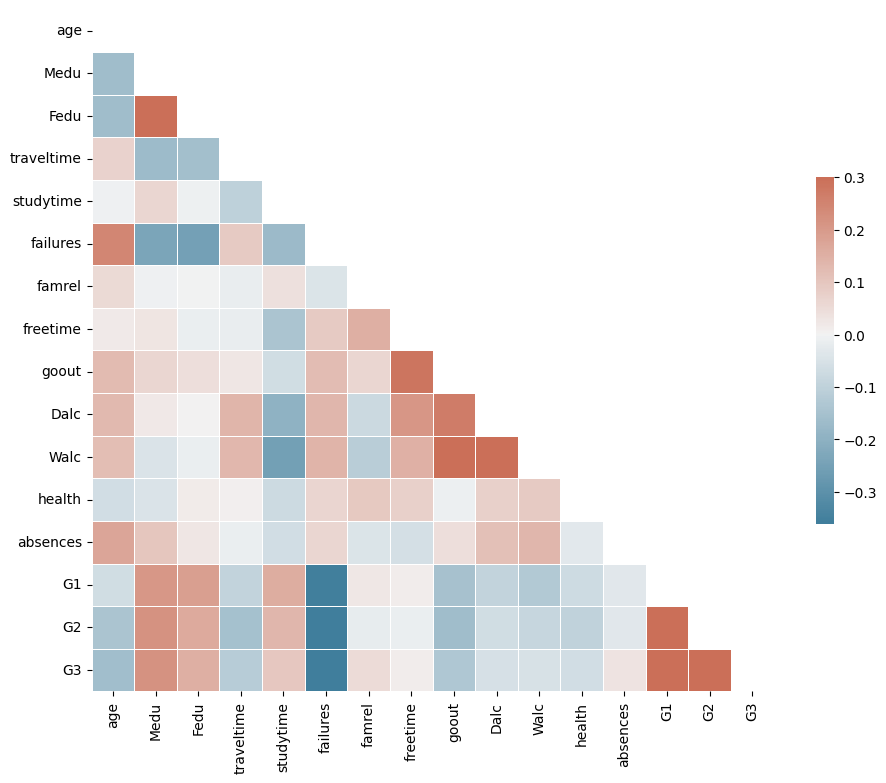

In [30]:
corr = df[num_cols].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

<Axes: >

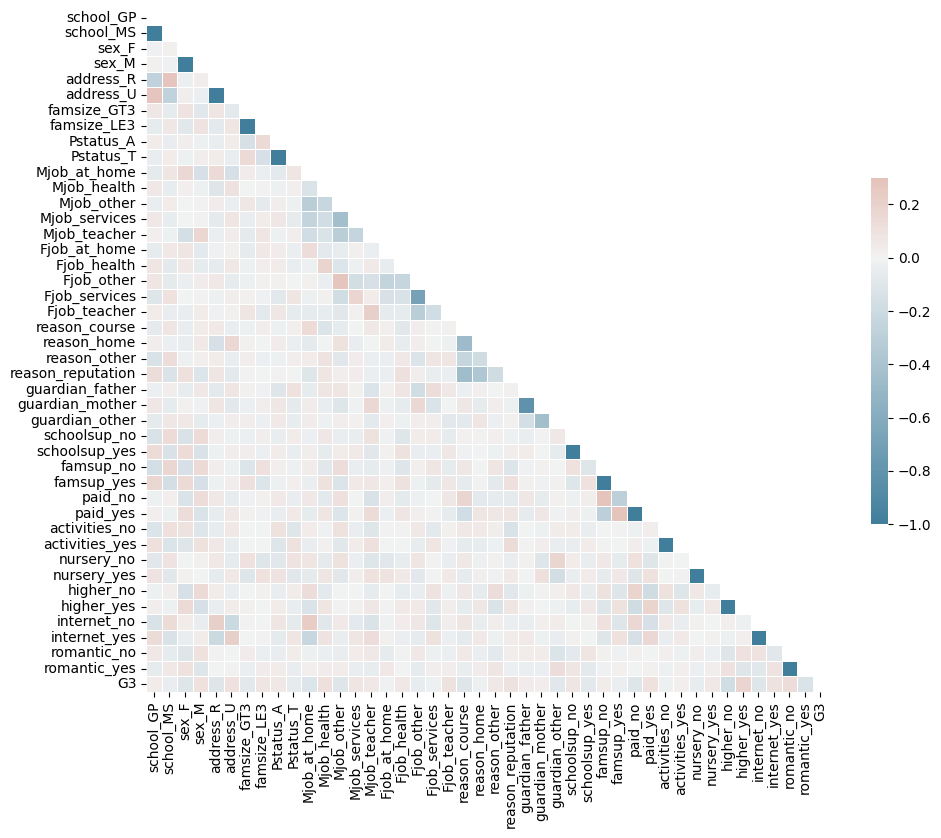

In [40]:
# Categorical variables importance
df_cats = df[obj_cols]
df_cats = pd.get_dummies(df_cats, dtype=int)
df_cats = df_cats.join(df['G3'])

corr = df_cats.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

As we can see from correlation, numerical columns that has most effect into G3 (final grade) are G1 and G2 (logically correct), Medu and Fedu also have some effect into the overall performance (also reasonable), studytime, femrel and absences also has some correlation even though I was expecting them to have much more power.

From categorical features, G3 has most correlation with if higher_yes is 1, romantic relationships, reason of study, father job, gender, and family size features.

#### Step 7: Create Linear Regression and Random-Forest Regressor model using scikit learn. Also define the KFold with n_splits=10. (3 marks)
1. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html
2. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
3. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [41]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)

linear_model = LinearRegression()

rf_model = RandomForestRegressor(random_state=42)

#### Step 8: You have selected the attributes that influence G3 in step 6. You will use them to predict G3; however, you cannot simply feed them to your regression model. You will need to transform your dataset to appropriate format. Complete the following step:
1. Define X and y  
2. Split them into train and test dataset in 80:20 ratio
3. Scale the data using standard scaler if necessary
4. Encode your categorical variable using suitable encoding method (One hot Encoder or Label Encoder)
#### (4 marks)

For features of training will only take numerical features and only romantic categorical feature I mentioned above.

In [45]:
X = df[['age', 'Medu', 'Fedu', 'studytime', 'famrel', 'freetime', 'goout', 'health', 'absences', 'G1', 'G2', 'romantic']]
y = df['G3']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((316, 12), (79, 12), (316,), (79,))

In [56]:
from sklearn.preprocessing import LabelEncoder

X_train_romantic = X_train['romantic']
X_test_romantic = X_test['romantic']

X_train_numeric = X_train.drop(columns=['romantic'])
X_test_numeric = X_test.drop(columns=['romantic'])

le = LabelEncoder()
X_train_romantic = le.fit_transform(X_train_romantic)
X_test_romantic = le.transform(X_test_romantic)

In [57]:
# Scale the data using standard scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train_numeric.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test_numeric.columns)

In [59]:
X_train_scaled_df['romantic'] = X_train_romantic
X_test_scaled_df['romantic'] = X_test_romantic

#### Step 9: Before we start training our data, we will need to find the best model among the two different models we have defined. For this we will evaluate the linear regression model and random forest regressor model using cross validation technique. Perform cross-validation with appropriate scoring criteria and select the best model.(Optional: You can define and add more models for evaluation) (5 marks)

In [64]:
#### you should print what is the average scores for each model
scoring = 'neg_mean_squared_error'

linear_cv_scores = cross_val_score(linear_model, X_train_scaled_df, y_train, cv=kf, scoring=scoring)

linear_mean_mse = -linear_cv_scores.mean()
print(f"Linear Regression Mean Cross-Validation MSE: {linear_mean_mse:.3f}")

rf_cv_scores = cross_val_score(rf_model, X_train_scaled_df, y_train, cv=kf, scoring=scoring)

rf_mean_mse = -rf_cv_scores.mean()
print(f"Random Forest Mean Cross-Validation MSE: {rf_mean_mse:.3f}")

Linear Regression Mean Cross-Validation MSE: 3.540
Random Forest Mean Cross-Validation MSE: 2.430


#### Step 10: Now using GridSearchCV and find the best combination of hyperparameters for your model. Print out the best estimators.(5 marks)

In [65]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],         # Number of trees in the forest
    'max_depth': [10, 20, 30, None],         # Maximum depth of each tree
    'max_features': ['auto', 'sqrt'],        # Number of features to consider at each split
    'min_samples_split': [2, 5, 10],         # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],           # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]               # Whether bootstrap samples are used when building trees
}

rf_model = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=kf, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

grid_search.fit(X_train_scaled_df, y_train)

print("Best hyperparameters found by GridSearchCV:")
print(grid_search.best_params_)

best_rf_model = grid_search.best_estimator_
print(f"\nBest Random Forest Estimator:\n {best_rf_model}")

Fitting 10 folds for each of 432 candidates, totalling 4320 fits
Best hyperparameters found by GridSearchCV:
{'bootstrap': False, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Best Random Forest Estimator:
 RandomForestRegressor(bootstrap=False, max_depth=20, max_features='sqrt',
                      random_state=42)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
2160 fits failed out of a total of 4320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2160 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/u

In [66]:
best_rf_model, grid_search.best_params_

(RandomForestRegressor(bootstrap=False, max_depth=20, max_features='sqrt',
                       random_state=42),
 {'bootstrap': False,
  'max_depth': 20,
  'max_features': 'sqrt',
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 100})

#### Step 11: Train your model (1 marks)

In [67]:
best_rf_model.fit(X_train_scaled_df, y_train)

RandomForestRegressor(bootstrap=False, max_depth=20, max_features='sqrt',
                      random_state=42)

#### Step 12: Predict the value of your test dataset and calculate the mean squared error. (2 marks)

In [68]:
y_pred = best_rf_model.predict(X_test_scaled_df)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.3f}")

Mean Squared Error (MSE): 3.694


#### Step 13: Plot the a horizontal barchart using barh to print the feature importances value with its appropriate column. (3 marks)

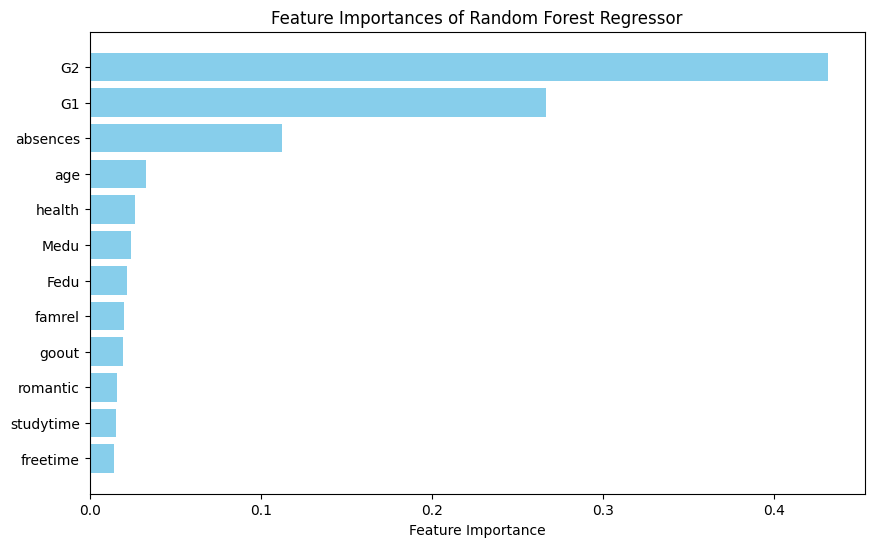

In [69]:
importances = best_rf_model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importances of Random Forest Regressor')
plt.gca().invert_yaxis()
plt.show()